In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Analysis/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))

df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

Summary statistics of numerical features : 
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

Total number of reviews:  50000

Total number of Sentiments:  2


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


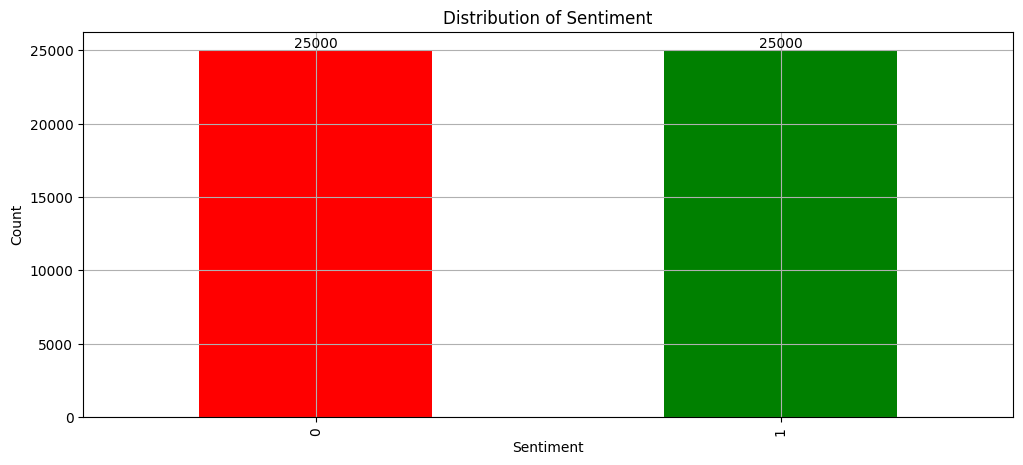

In [4]:
plt.figure(figsize=(12, 5))

# Assuming your DataFrame is named 'df' and the sentiment column is named 'sentiment'
colors = ['red', 'green']  # Red for 0, Green for 1
value_counts = df['sentiment'].value_counts().sort_index()
ax = value_counts.plot(kind='bar', color=colors)

plt.title('Distribution of Sentiment')
plt.grid()
plt.xlabel('Sentiment')
plt.ylabel('Count')

ax.set_facecolor("white")

# Annotate the bars with their respective counts
for index, value in enumerate(value_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()  # Display the plot

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

df

,review,sentiment
11841,John Cassavetes is on the run from the law. He...,1
19602,It's not just that the movie is lame. It's mor...,0
45519,"Well, if it weren't for Ethel Waters and a 7-y...",0
25747,I find Alan Jacobs review very accurate concer...,1
42642,This movie is simply awesome. It is so hilario...,1
...,...,...
9869,This is an excellent movie that tackles the is...,1
42192,i was kinda interested in this movie as a tras...,0
12143,I think I am some kind of Road Runner fan. I d...,1
34963,Two years passed and mostly everyone looks dif...,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 4500 training examples and 500 validation examples. 

Show a review in the training set : 
 THE CRIMSON RIVERS is one of the most over-directed, over-the-top, over-everything mess I've ever seen come out of France. There's nothing worse than a French production trying to out-do films made in Hollywood and CR is a perfect example of such a wannabe horror/action/buddy flick. I almost stopped it halfway through because I knew it wouldn't amount to anything but French guys trying to show-off.<br /><br />The film starts off promisingly, like some sort of expansive horror film, but it quickly shifts genres, from horror to action to x-files type to buddy flick, that in the end, CR is all of it and also none of it. It's so full of clichés that at one point I thought the whole thing was a comedy. The painful dialogue and those silent pauses, with fades outs and fades ins just at the right expositionary moments, made me groan. I thought only films made in Hollywood used this hackneyed techn

(23499    Paul Naschy as a ghostly security guard in thi...
 32754    For every series that makes it to television, ...
 41199    I had the displeasure of watching this movie w...
 4152     Hear are some of the interesting things our co...
 36723    Every time I think about this film I feel phys...
                                ...                        
 33530    I can not believe such slanted, jingoistic mat...
 16729    This movie was rented by a friend. Her choice ...
 33642    A British teen movies which centres around a g...
 10195    I only gave this film a 4 because I saw it in ...
 7520     What a disappointment!<br /><br />This film se...
 Name: review, Length: 4500, dtype: object,
 23499    1
 32754    0
 41199    0
 4152     0
 36723    0
         ..
 33530    0
 16729    0
 33642    0
 10195    0
 7520     0
 Name: sentiment, Length: 4500, dtype: int64)

In [8]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split()

    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True:

        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:
        return (words)

    return( " ".join(words))

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 the crimson rivers is one of the most over directed over the top over everything mess i ve ever seen come out of france there s nothing worse than a french production trying to out do films made in hollywood and cr is a perfect example of such a wannabe horror action buddy flick i almost stopped it halfway through because i knew it wouldn t amount to anything but french guys trying to show off the film starts off promisingly like some sort of expansive horror film but it quickly shifts genres from horror to action to x files type to buddy flick that in the end cr is all of it and also none of it it s so full of clich s that at one point i thought the whole thing was a comedy the painful dialogue and those silent pauses with fades outs and fades ins just at the right expositionary moments made me groan i thought only films made in hollywood used this hackneyed technique the chase scene with vincent cassel running after the killer is so over 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer()
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names_out())) #6378
print("Show some feature names : \n", countVect.get_feature_names_out()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 36751 

Show some feature names : 
 ['aa' 'ameche' 'auggie' 'betrayals' 'bright' 'cathryn' 'clownhouse'
 'copying' 'dazzle' 'disarray' 'dvd' 'estimation' 'fighter' 'fusion'
 'greenfinch' 'henson' 'imaginings' 'ir' 'kint' 'linklater' 'maropis'
 'misik' 'nectar' 'organise' 'performing' 'pre' 'rages' 'reputedly'
 'saddled' 'sexiness' 'smith' 'steal' 'swoozie' 'tinfoil' 'unattuned'
 'vernacular' 'willed']


MultinomialNB()

In [11]:
import pickle
pickle.dump(countVect,open('countVect_imdb.pkl','wb'))

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [13]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8140

AUC score : 0.8142

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       249
           1       0.85      0.77      0.81       251

    accuracy                           0.81       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500


Confusion Matrix : 
 [[214  35]
 [ 58 193]]


In [14]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model_imdb.pkl','wb'))

In [15]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have already defined X_train and y_train
tfidf = TfidfVectorizer(min_df=5)  # minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features: %d\n" % X_train_tfidf.shape[1])  # Get the number of features directly from the transformed data
print("Show some feature names:\n", tfidf.get_feature_names_out()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features: 10505

Show some feature names:
 ['00' 'belonged' 'completion' 'dubious' 'garbage' 'interviewing' 'million'
 'plays' 'rough' 'strike' 'vein']


LogisticRegression()

In [16]:
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

sorted_coef_index = lr.coef_[0].argsort()[::-1]
print('Top 10 features with largest coefficients:\n{}'.format(feature_names[sorted_coef_index[:10]]))


Top 10 features with smallest coefficients:
['bad' 'worst' 'awful' 'no' 'waste' 'poor' 'terrible' 'boring' 'even'
 'minutes']

Top 10 features with largest coefficients:
['great' 'and' 'excellent' 'best' 'it' 'wonderful' 'very' 'also' 'well'
 'love']


In [17]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8500

AUC score : 0.8500

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       249
           1       0.85      0.85      0.85       251

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500


Confusion Matrix : 
 [[211  38]
 [ 37 214]]


In [18]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10],
          "tfidf__min_df": [1, 3],
          "tfidf__max_features": [1000, None],
          "tfidf__ngram_range": [(1,1), (1,2)],
          "tfidf__stop_words": [None, "english"]}

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.8720

AUC score : 0.8720

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       249
           1       0.87      0.88      0.87       251

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500


Confusion Matrix : 
 [[216  33]
 [ 31 220]]


In [19]:
import nltk
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):

    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer,remove_stopwords=False)

print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


4500 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['the', 'crimson', 'rivers', 'is', 'one', 'of', 'the', 'most', 'over', 'directed', 'over', 'the', 'top', 'over', 'everything', 'mess', 'i', 've', 'ever', 'seen', 'come', 'out', 'of', 'france', 'there', 's', 'nothing', 'worse', 'than', 'a', 'french', 'production', 'trying', 'to', 'out', 'do', 'films', 'made', 'in', 'hollywood', 'and', 'cr', 'is', 'a', 'perfect', 'example', 'of', 'such', 'a', 'wannabe', 'horror', 'action', 'buddy', 'flick', 'i', 'almost', 'stopped', 'it', 'halfway', 'through', 'because', 'i', 'knew', 'it', 'wouldn', 't', 'amount', 'to', 'anything', 'but', 'french', 'guys', 'trying', 'to', 'show', 'off', 'the', 'film', 'starts', 'off', 'promisingly', 'like', 'some', 'sort', 'of', 'expansive', 'horror', 'film', 'but', 'it', 'quickly', 'shifts', 'genres', 'from', 'horror', 'to', 'action', 'to', 'x', 'files', 'type', 'to', 'buddy', 'flick', 'that', 'in', 'the', 'end', 'cr', 'is', 'all', 

[===============================================---] 94.6% 29.9/31.6MB downloaded
Training Word2Vec model ...



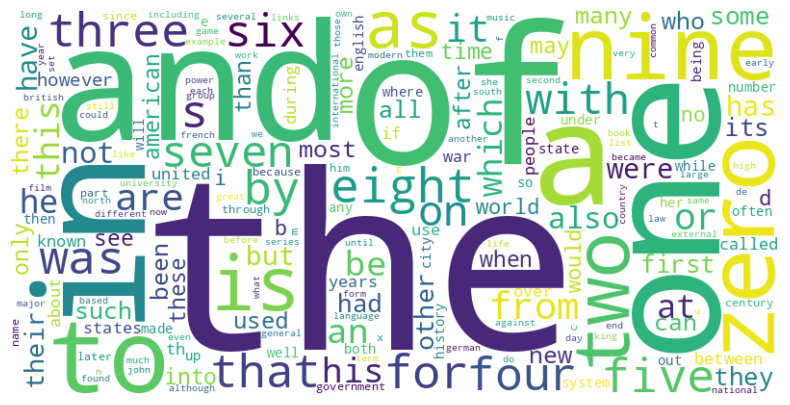

Number of words in the vocabulary list: 47134

Show first 10 words in the vocabulary list:
 ['the', 'of', 'and', 'one', 'in', 'a', 'to', 'zero', 'nine', 'two']


In [64]:
from gensim.models import Word2Vec
from collections import Counter
import gensim.downloader as api
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
sentences = api.load("text8")  # Use a Gensim dataset for demonstration

# Train the Word2Vec model
num_features = 300  # embedding dimension
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count,
               window=context, sample=downsampling)
w2v.init_sims(replace=True)

# Calculate word frequencies
word_freq = Counter()
for sentence in sentences:
    word_freq.update(sentence)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print("Number of words in the vocabulary list: %d\n" % len(w2v.wv.index_to_key))
print("Show first 10 words in the vocabulary list:\n", w2v.wv.index_to_key[0:10])



In [21]:
def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words
    appeared in that review and in the volcabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [23]:
def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs


In [25]:
import nltk
import numpy as np
nltk.download('stopwords')

# Assuming you have the cleanText, getAvgFeatureVecs, and makeFeatureVec functions defined

# Your original code for cleaning and preprocessing

# ...

# Assuming you have defined the Word2Vec model 'w2v' and the number of features 'num_features'

def getAvgFeatureVecs(reviews, model, num_features):
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype="float32")
    counter = 0
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1
    return reviewFeatureVecs

def makeFeatureVec(review, model, num_features):
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0.

    # Update this line to use 'index_to_key' instead of 'index2word'
    index2word_set = set(model.wv.index_to_key)

    isZeroVec = True
    for word in review:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model.wv[word])
            isZeroVec = False
    if isZeroVec is False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

# Your original code for extracting feature vectors and printing shape

# ...

X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training set : 4500 feature vectors with 300 dimensions
Validation set : 500 feature vectors with 300 dimensions


**Random Forest Classifer**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.7560

AUC score : 0.7560

Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76       249
           1       0.76      0.75      0.76       251

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500


Confusion Matrix : 
 [[189  60]
 [ 62 189]]


In [27]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, GRU

from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
top_words = 40000
maxlen = 200
batch_size = 62
nb_classes = 4
nb_epoch = 6


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)


X_train_seq = pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = pad_sequences(sequences_test, maxlen=maxlen)

# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

X_train shape: (4500, 200)
X_test shape: (500, 200)
y_train shape: (4500, 4)
y_test shape: (500, 4)


In [29]:
from tensorflow.keras.layers import Dropout

model1 = Sequential()
model1.add(Embedding(top_words, 128))  # Embedding layer without dropout
model1.add(Dropout(0.2))  # Apply dropout regularization here
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer with dropout
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         5120000   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 5,252,100
Trainable params: 5,252,100
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)


# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/6
73/73 [==============================] - 87s 1s/step - loss: 0.3923 - accuracy: 0.4918
Epoch 2/6
73/73 [==============================] - 69s 951ms/step - loss: 0.3388 - accuracy: 0.5824
Epoch 3/6
73/73 [==============================] - 71s 981ms/step - loss: 0.2555 - accuracy: 0.7713
Epoch 4/6
73/73 [==============================] - 76s 1s/step - loss: 0.1504 - accuracy: 0.8747
Epoch 5/6
73/73 [==============================] - 72s 992ms/step - loss: 0.0752 - accuracy: 0.9447
Epoch 6/6
9/9 [==============================] - 2s 188ms/step - loss: 0.3874 - accuracy: 0.7340
Test loss : 0.3874
Test accuracy : 0.7340


In [31]:
len(X_train_seq),len(y_train_seq)

(4500, 4500)

In [36]:
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape)

# get weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model1.layers[2].get_weights()[0].shape)

# get weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model1.layers[3].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (40000, 128)
Size of weight matrix in the hidden layer :  (128, 512)
Size of weight matrix in the output layer :  (128, 4)


In [37]:
import pickle
pickle.dump(model1,open('model1.pkl','wb'))

In [42]:
from gensim.models import Word2Vec

# Load the Word2Vec model
w2v = Word2Vec.load("/content/w2v_300features_10minwordcounts_10context")

# Retrieve the embedding matrix
embedding_matrix = w2v.wv.vectors
print("Shape of embedding matrix:", embedding_matrix.shape)


Shape of embedding matrix: (6945, 300)


In [60]:
# !pip install --upgrade keras tensorflow


In [55]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils

# Assuming you have defined X_train, X_test, y_train, y_test, and other necessary variables

top_words = embedding_matrix.shape[0]  # 4016
maxlen = 300
batch_size = 62
nb_classes = 4
nb_epoch = 7

# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(num_words=top_words)  # Consider top 4016 words
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Manually pad sequences to a fixed length
X_train_seq1 = np.array([seq + [0] * (maxlen - len(seq)) if len(seq) < maxlen else seq[:maxlen] for seq in sequences_train])
X_test_seq1 = np.array([seq + [0] * (maxlen - len(seq)) if len(seq) < maxlen else seq[:maxlen] for seq in sequences_test])

# One-hot encoding of y_train and y_test
y_train_seq1 = np_utils.to_categorical(y_train, nb_classes)
y_test_seq1 = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq1.shape)
print('X_test shape:', X_test_seq1.shape)
print('y_train shape:', y_train_seq1.shape)
print('y_test shape:', y_test_seq1.shape)


X_train shape: (4500, 300)
X_test shape: (500, 300)
y_train shape: (4500, 4)
y_test shape: (500, 4)


In [56]:
len(X_train_seq1),len(y_train_seq1)

(4500, 4500)

In [58]:
from keras.layers import Embedding, LSTM, Dense, Activation
from keras.models import Sequential

embedding_layer = Embedding(embedding_matrix.shape[0], # 4016
                            embedding_matrix.shape[1], # 300
                            weights=[embedding_matrix])

model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         2083500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 2,303,664
Trainable params: 2,303,664
Non-trainable params: 0
_________________________________________________________________


In [62]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq1, y_train_seq1, batch_size=batch_size, epochs=nb_epoch, verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq1, y_test_seq1, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/7
73/73 [==============================] - 213s 3s/step - loss: 0.3688 - accuracy: 0.5049
Epoch 2/7
73/73 [==============================] - 186s 3s/step - loss: 0.3483 - accuracy: 0.4969
Epoch 3/7
73/73 [==============================] - 182s 2s/step - loss: 0.3446 - accuracy: 0.5387
Epoch 4/7
73/73 [==============================] - 185s 3s/step - loss: 0.3397 - accuracy: 0.5522
Epoch 5/7
73/73 [==============================] - 185s 3s/step - loss: 0.3316 - accuracy: 0.5558
Epoch 6/7
73/73 [==============================] - 178s 2s/step - loss: 0.3232 - accuracy: 0.5576
Epoch 7/7
9/9 [==============================] - 3s 278ms/step - loss: 0.3530 - accuracy: 0.5100
Test loss : 0.3530
Test accuracy : 0.5100


In [63]:
print("Size of weight matrix in the embedding layer : ", \
      model2.layers[0].get_weights()[0].shape)

print("Size of weight matrix in the hidden layer : ", \
      model2.layers[1].get_weights()[0].shape)

print("Size of weight matrix in the output layer : ", \
      model2.layers[2].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (6945, 300)
Size of weight matrix in the hidden layer :  (300, 512)
Size of weight matrix in the output layer :  (128, 4)
